# INFO 212: Data Science Programming 1
___

### Week 9: Data Analysis Examples
___

### Mon., 28, 2018 (Holiday, no class), and Wed., May 230, 2018
---

**Question:**
- What can I learn from real world data analysis examples? 

**Objectives:**
- Apply the techiques learned in this course to real world datay analysis problems

In [2]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## USDA Food Database
The US Department of Agriculture makes available a database of food nutrient information. 
The records look like this:

```
{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
      "amount": 1,
      "unit": "wing, with skin",
      "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
      "value": 20.8,
      "units": "g",
      "description": "Protein",
      "group": "Composition"
    },

    ...
  ]
}
```

Each food has a number of identifying attributes along with two lists of nutrients and portion sizes. Data in this form is not particularly amenable to analysis, so we need to do some work to wrangle the data into a better form.

```
import json
db = json.load(open('datasets/usda-food-database.json'))
len(db)```

In [4]:
import json
db = json.load(open('datasets/usda-food-database.json'))
len(db)

6636

Each entry in db is a dict containing all the data for a single food. The 'nutrients'
field is a list of dicts, one for each nutrient:

```
import pandas as pd
db[0].keys()```

In [5]:
import pandas as pd
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

```
db[0]['nutrients'][0]```

In [7]:
len(db[0]['nutrients'])

162

```
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients.head()```

In [8]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients.head()

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00


In [9]:
nutrients.tail()

,description,group,units,value
157,Serine,Amino Acids,g,1.472
158,Cholesterol,Other,mg,93.000
159,"Fatty acids, total saturated",Other,g,18.584
160,"Fatty acids, total monounsaturated",Other,g,8.275
161,"Fatty acids, total polyunsaturated",Other,g,0.830


When converting a list of dicts to a DataFrame, we can specify a list of fields to
extract. We’ll take the food names, group, ID, and manufacturer:

```
info_keys = ['description', 'group', 'id', 'manufacturer']```

In [10]:
info_keys = ['description', 'group', 'id', 'manufacturer']

```
info = pd.DataFrame(db, columns=info_keys)
info.head()```

In [11]:
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


```
info.info()```

In [12]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [20]:
info.group.nunique()

25

You can see the distribution of food groups with value_counts:

```
pd.value_counts(info.group)[:10]```

In [19]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
                                    ... 
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs                      41
Name: group, Length: 25, dtype: int64

Now, to do some analysis on all of the nutrient data, it’s easiest to assemble the
nutrients for each food into a single large table. To do so, we need to take several
steps. First, I’ll convert each list of food nutrients to a DataFrame, add a column for
the food id, and append the DataFrame to a list. Then, these can be concatenated
together with concat:

```
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)```

In [21]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)


```
nutrients```

In [22]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


Check duplicates:

```
nutrients.duplicated().sum()  # number of duplicates```

In [23]:
nutrients.duplicated().sum()

14179

```
nutrients = nutrients.drop_duplicates()```

In [24]:
nutrients = nutrients.drop_duplicates()

Since 'group' and 'description' are in both DataFrame objects, we can rename for
clarity:

```
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}```

In [25]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}

```
info = info.rename(columns=col_mapping, copy=False)
info.info()```

In [26]:
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


```
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.head()```

In [27]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.head()

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


With all of this done, we’re ready to merge info with nutrients:

```
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()```

In [28]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


```
ndata.iloc[30000]```

In [29]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

We could now make a plot of median values by food group and nutrient type

```
fig = plt.figure()```

In [30]:
fig = plt.figure()

```
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)```

In [37]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

In [38]:
result.head()

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
Name: value, dtype: float64

```
result['Zinc, Zn'].sort_values().plot(kind='barh')```

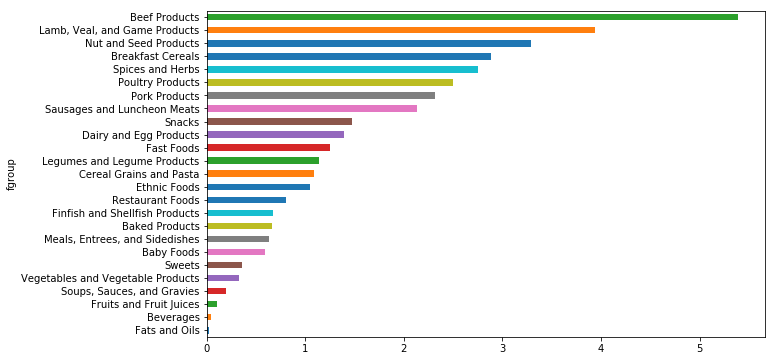

In [39]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

We can find which food is most dense in each nutrient:

```
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]```

In [40]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

```
max_foods.loc['Amino Acids']['food']```

In [42]:
max_foods.loc['Composition']['food']

nutrient
Adjusted Protein                          Baking chocolate, unsweetened, squares
Carbohydrate, by difference          Sweeteners, tabletop, fructose, dry, powder
Fiber, total dietary                                            Corn bran, crude
Protein                        Soy protein isolate, potassium type, crude pro...
Sugars, total                                                 Sugars, granulated
Total lipid (fat)                                                Oil, wheat germ
Water                                              Water, bottled, POLAND SPRING
Name: food, dtype: object

## 2012 Federal Election Commission Database
The US Federal Election Commission publishes data on contributions to political
campaigns. This includes contributor names, occupation and employer, address, and
contribution amount. An interesting dataset is from the 2012 US presidential election.
A version of the dataset is a 150 megabyte CSV file
P00000001-ALL.csv

```
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()```

A simple records looks like:

```
fec.iloc[123456]```

You may think of some ways to start slicing and dicing this data to extract informative
statistics about donors and patterns in the campaign contributions. Here is 
a number of different analyses that apply techniques in this course.

You can see that there are no political party affiliations in the data, so this would be
useful to add. You can get a list of all the unique political candidates using unique:

```
unique_cands = fec.cand_nm.unique()
unique_cands```

One way to indicate party affiliation is using a dict (for illustration purpose only):

```
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}```

Now, using this mapping and the map method on Series objects, you can compute an
array of political parties from the candidate names:

```
fec.cand_nm[123456:123461]```

```
fec.cand_nm[123456:123461].map(parties)```

```
`fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()```

A couple of data preparation points. First, this data includes both contributions and
refunds (negative contribution amount):

```
(fec.contb_receipt_amt > 0).value_counts()```

To simplify the analysis, I’ll restrict the dataset to positive contributions:

```
fec = fec[fec.contb_receipt_amt > 0]```

Since Barack Obama and Mitt Romney were the main two candidates, I’ll also prepare
a subset that just has contributions to their campaigns:

```
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]```

### Donation Statistics by Occupation and Employer
Donations by occupation is another oft-studied statistic. For example, lawyers (attorneys)
tend to donate more money to Democrats, while business executives tend to
donate more to Republicans. You have no reason to believe it; you can see for yourself
in the data. First, the total number of donations by occupation is easy:

```
fec.contbr_occupation.value_counts()[:10]```

You will notice by looking at the occupations that many refer to the same basic job
type, or there are several variants of the same thing. The following code snippet illustrates
a technique for cleaning up a few of them by mapping from one occupation to
another; note the “trick” of using dict.get to allow occupations with no mapping to
“pass through”:

```
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}```

```
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)```

Do the same thing for employer:

```
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)```

Now, you can use pivot_table to aggregate the data by party and occupation, then
filter down to the subset that donated at least $2 million overall:

```
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')```

```
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm```

It can be easier to look at this data graphically as a bar plot ('barh' means horizontal
bar plot:

```
plt.figure()```

```
over_2mm.plot(kind='barh')```

You might be interested in the top donor occupations or top companies that donated
to Obama and Romney. To do this, you can group by candidate name and use a variant
of the top method from earlier in the chapter:

```
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)```

Then aggregate by occupation and employer:

```
grouped = fec_mrbo.groupby('cand_nm')```

```
grouped.apply(get_top_amounts, 'contbr_employer', n=10)```

```
grouped.apply(get_top_amounts, 'contbr_employer', n=10)```

### Bucketing Donation Amounts
A useful way to analyze this data is to use the cut function to discretize the contributor
amounts into buckets by contribution size:

```
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels```

We can then group the data for Obama and Romney by name and bin label to get a
histogram by donation size:

```
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)```

This data shows that Obama received a significantly larger number of small donations
than Romney. You can also sum the contribution amounts and normalize within
buckets to visualize percentage of total donations of each size by candidate:

```
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums```

```
normed_sums[:-2].plot(kind='barh')```

### Donation Statistics by State
Aggregating the data by candidate and state is a routine affair:

```
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]```

If you divide each row by the total contribution amount, you get the relative percentage
of total donations by state for each candidate:

```
percent = totals.div(totals.sum(1), axis=0)
percent[:10]```